In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()

In [2]:
data = pd.read_excel("Concrete_Data.xls")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [5]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

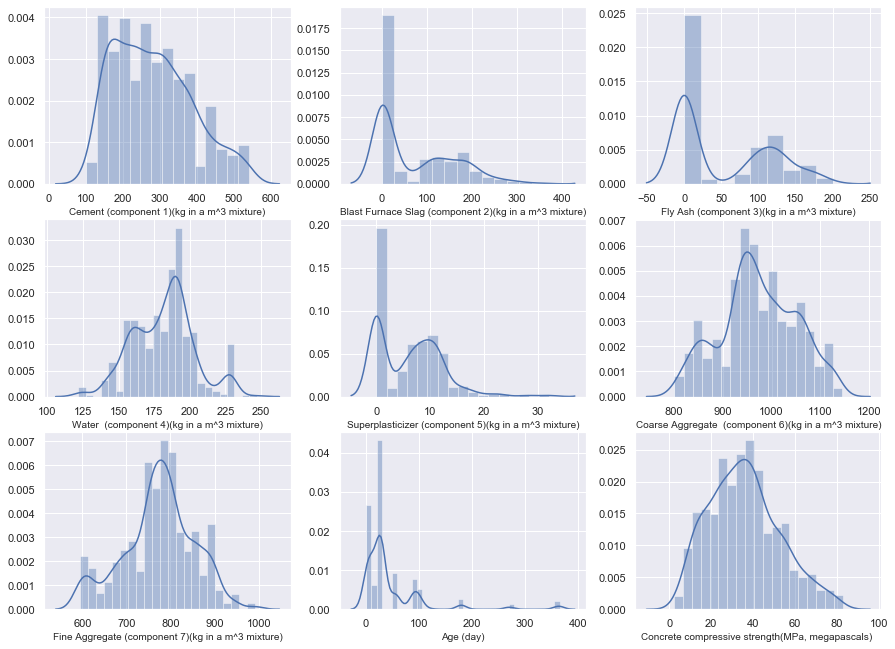

In [6]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

## Data Transformation

In [7]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [8]:
y = data['Concrete compressive strength(MPa, megapascals) ']

In [11]:
# before doing the log transformation, 
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0

for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

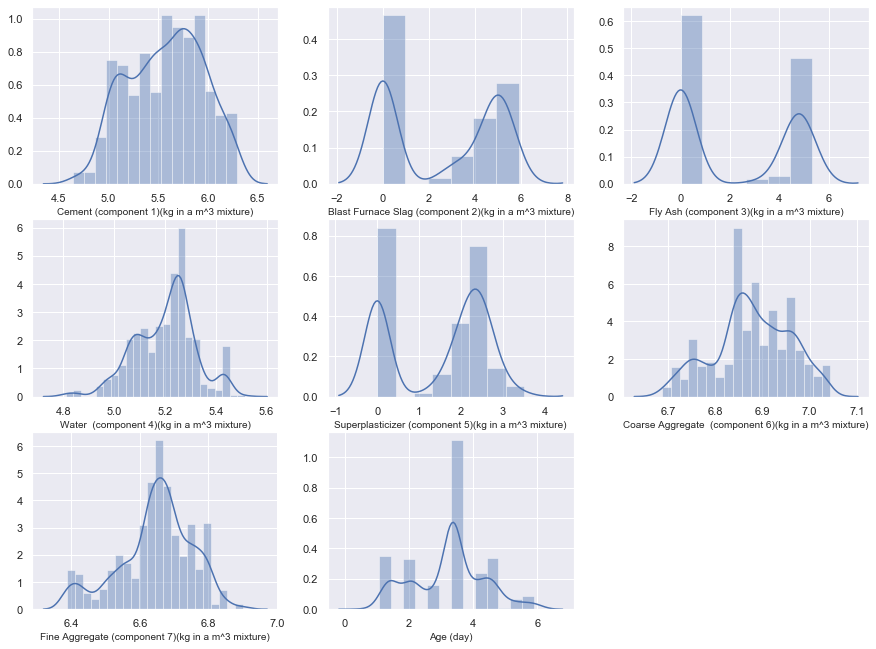

In [12]:
import numpy as np

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

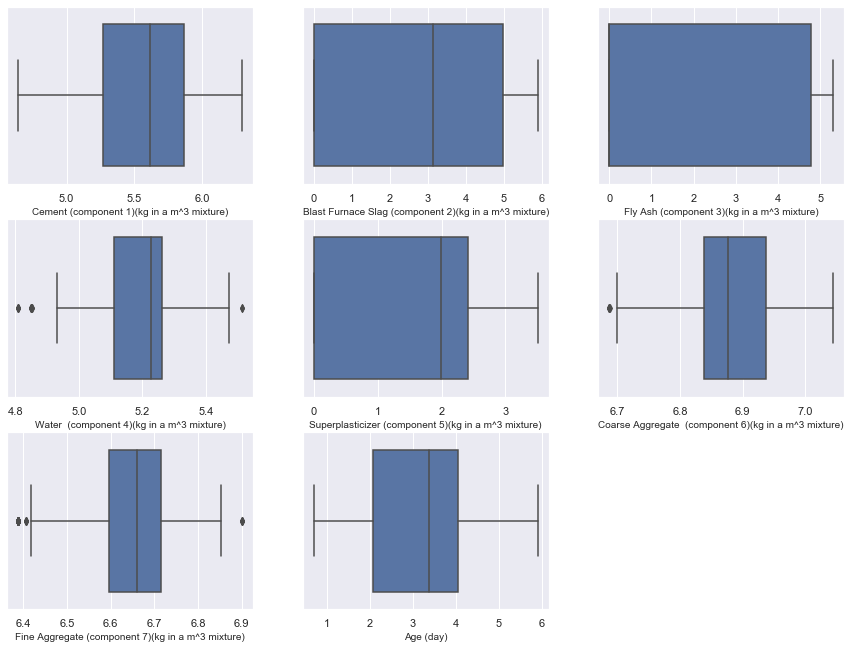

In [13]:
# let's check for outliers 

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

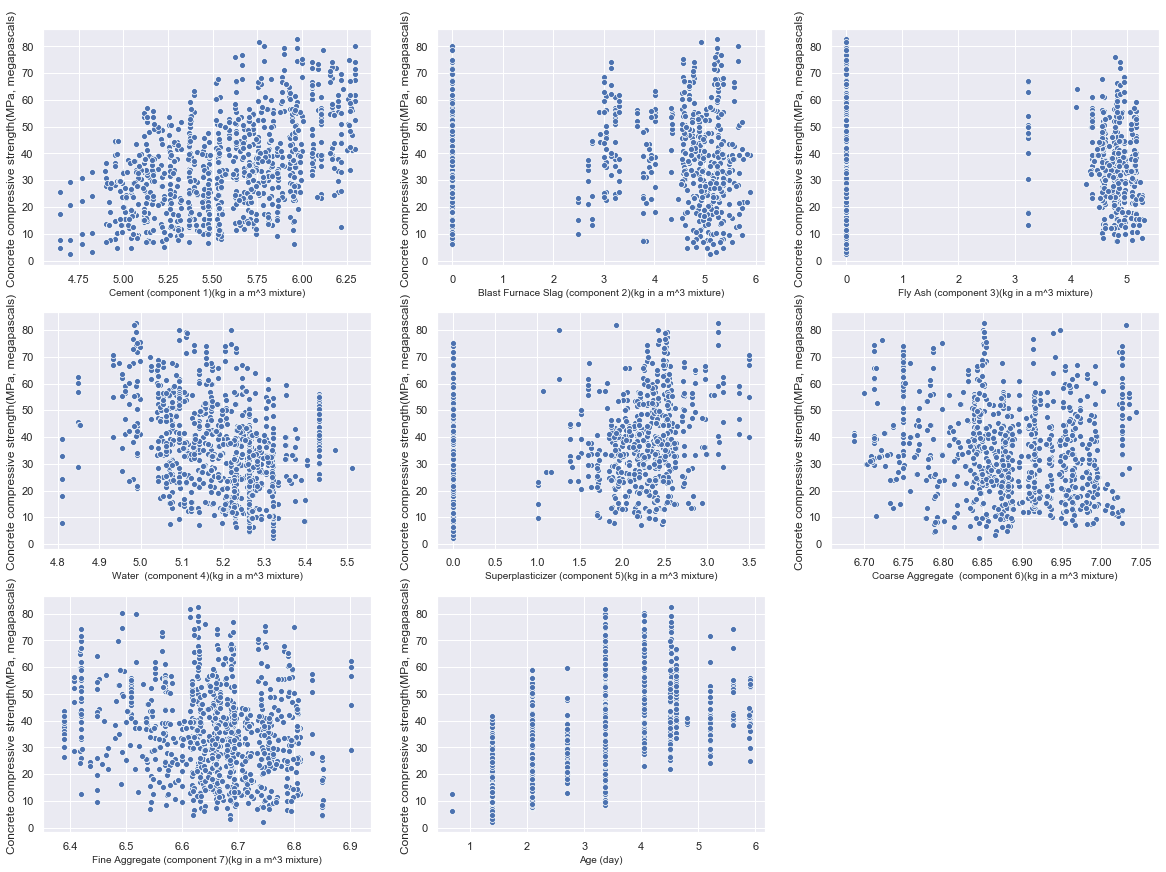

In [14]:
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(X[column],y)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data.
We will also Random forest regressor and compare our results from both the models.

In [15]:
# let's check for correaltion using heatmap

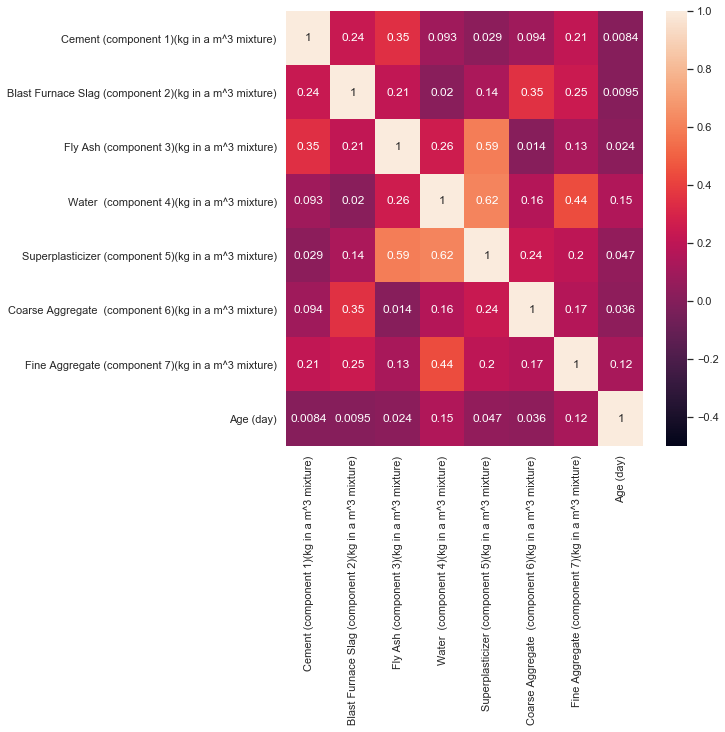

In [16]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther is an issue with 3.1.1 , annotation gets cut from top and bottom


Great! none of our columns seem to be correlated.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scalar = StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1 / 3, random_state=36,)

x_train = pd.DataFrame(scalar.fit_transform(x_train),columns = x_train.columns, index=x_train.index )
x_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns, index=x_test.index)

In [20]:
x_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
377,0.960364,-1.077416,-0.927142,1.461699,-1.309462,0.422971,-0.080896,0.733205
520,0.226086,0.074452,1.152025,-0.063084,0.320583,-1.710492,0.392817,-1.637907
950,0.590839,-1.077416,1.142764,0.827112,0.846976,-2.315844,0.290598,0.130105
51,-0.823052,1.104634,-0.927142,1.971152,-1.309462,-0.475799,-1.318071,1.764422
724,0.455165,-1.077416,-0.927142,0.526096,-1.309462,0.525535,0.733587,1.150717
...,...,...,...,...,...,...,...,...
799,1.909129,-1.077416,-0.927142,-0.349520,-1.309462,1.812774,-2.169721,-1.637907
963,-1.438099,1.195682,-0.927142,-0.310763,0.924849,1.195265,-1.249689,0.130105
583,-0.553492,1.315243,-0.927142,0.245696,-1.309462,0.097550,-1.046029,0.130105
567,-0.644155,0.965672,-0.927142,0.245696,-1.309462,1.273482,-0.119429,-1.019284


In [21]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
945,-1.658836,0.978814,1.074523,0.883007,0.600297,-0.720495,-0.197566,0.103867
188,-0.442114,-1.050507,1.046791,0.408879,0.228503,-0.039058,1.146708,1.233730
529,0.821078,0.191473,1.204810,-1.320189,0.901633,-0.369026,0.373276,0.715741
917,-1.511403,1.093087,-0.887777,-0.442949,-0.288331,0.381316,0.682194,0.103867
117,0.461600,1.259928,-0.887777,-0.225249,0.715543,0.956923,-2.137048,0.103867
...,...,...,...,...,...,...,...,...
986,0.096471,0.883266,0.977050,1.267716,0.750775,-0.886086,-1.156662,0.103867
936,-0.275344,0.827292,0.920958,2.638249,0.442941,-1.616721,-0.943922,0.103867
926,-1.274418,1.176068,1.268197,0.953895,0.833034,-2.110647,-1.152551,0.103867
610,-0.285369,-1.050507,-0.887777,0.571642,-1.236505,-0.027117,1.302585,2.399529


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
import pickle

In [34]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [47]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [48]:
regression.score(x_train,y_train)

0.8019627993982197

In [49]:
adj_r2(x_train,y_train)

0.7996226256835752

Our r2 score is 80.196% and adj r2 is 79.99% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [50]:
regression.score(x_test,y_test)

0.8012536809816129

In [51]:
adj_r2(x_test,y_test)

0.796507500228935

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [83]:
#Using random forest we need not scale the values as decision tree is base estimator
from sklearn.ensemble import RandomForestRegressor

In [62]:
regressor=RandomForestRegressor()

In [63]:
#hyperparameters tuning
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Randomized Search CV
#Helps to find best parameters considering how many estimaters,max features and depth should be there
#Randomized search is faster than grid search cv
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [68]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [70]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [71]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [72]:
rf_random.best_score_

-35.69643170720936

In [74]:
predictions=rf_random.predict(x_test)

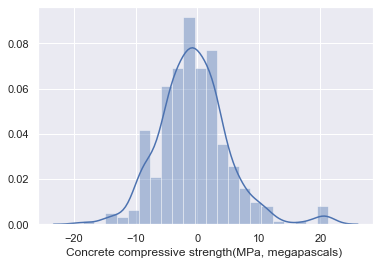

In [75]:
#Comparision
sns.distplot(y_test-predictions)

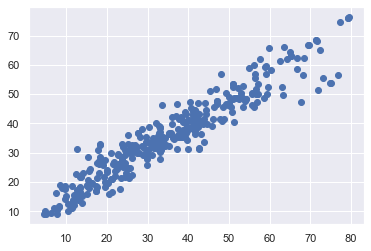

In [78]:
plot.scatter(y_test,predictions)

In [79]:
from sklearn import metrics

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.281562612217826
MSE: 32.75388459523263
RMSE: 5.723100959727395


In [86]:
regression.score(x_test,y_test)

0.8012536809816129

In [87]:
adj_r2(x_train,y_train)

0.7996226256835752

In [81]:

import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)